In [1]:
# 1. Environment Setup
import pandas as pd      # Data manipulation
import numpy as np       # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns    # Advanced visualization

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set plot style
sns.set_theme(style="whitegrid")

In [2]:
# 2. Loading the Iris Dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target

# Map numeric targets to species names
df["species_name"] = df["species"].map(
    {i: name for i, name in enumerate(iris.target_names)}
)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


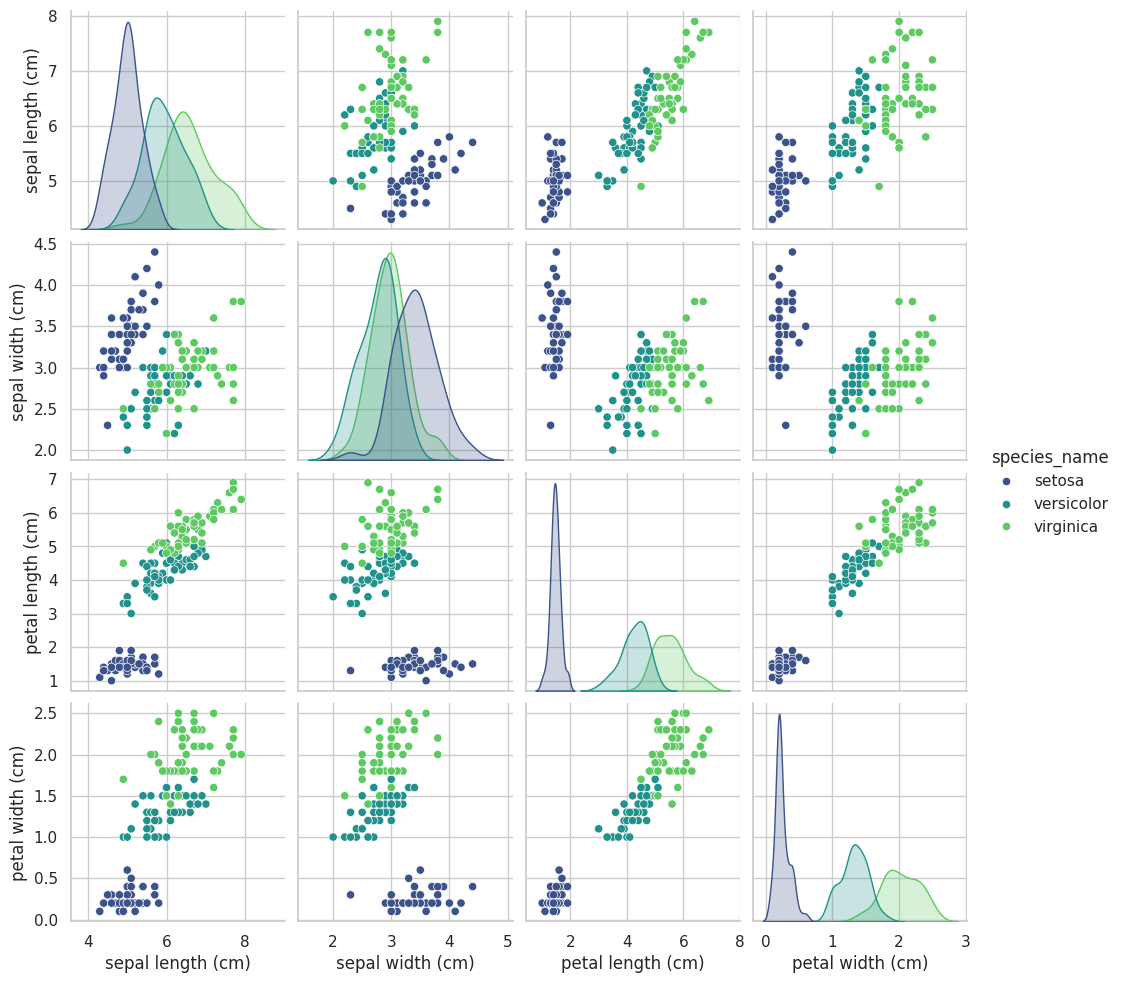

In [3]:
# 3. Exploratory Data Analysis
# Dataset structure and summary
print(df.info())
df.describe()

# Visualising relationships between features
sns.pairplot(
    df.drop("species", axis=1),
    hue="species_name",
    palette="viridis"
)
plt.show()

In [4]:
# 4. Feature Selection & Data Split
X = df[iris.feature_names]   # Feature matrix
y = df["species"]            # Target labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 120
Testing samples: 30


In [5]:
# 5. Small Experiment: Choosing k

print("Effect of different k values on model accuracy:")

for k in [1, 3, 5, 7]:
    temp_model = KNeighborsClassifier(n_neighbors=k)
    temp_model.fit(X_train, y_train)
    temp_preds = temp_model.predict(X_test)
    temp_acc = accuracy_score(y_test, temp_preds)
    print(f"k = {k} -> accuracy = {temp_acc:.2f}")

Effect of different k values on model accuracy:
k = 1 -> accuracy = 1.00
k = 3 -> accuracy = 1.00
k = 5 -> accuracy = 1.00
k = 7 -> accuracy = 0.97


In [6]:
# 6. Train Final Model (k=3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
# Evaluate model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The model accuracy is: {accuracy * 100:.2f}%")

The model accuracy is: 100.00%


In [7]:
# 7. Retrain on Full Dataset
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# 8. Classifying a New Flower
# Define the mystery flower as a DataFrame to avoid feature-name warnings
mystery_flower = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=iris.feature_names
)
prediction_index = model.predict(mystery_flower)[0]
predicted_name = iris.target_names[prediction_index]

print(f"The model predicts this flower is: {predicted_name.upper()}")

The model predicts this flower is: SETOSA


In [9]:
#Additional
def draw_flower(sepal_length, sepal_width, petal_length, petal_width, species):
    plt.figure(figsize=(5, 5))

    # Draw petals
    for angle in range(0, 360, 60):
        plt.polar(
            np.linspace(0, petal_length, 100),
            np.linspace(np.radians(angle), np.radians(angle), 100),
            linewidth=petal_width * 2,
            alpha=0.7
        )

    # Draw sepals (shorter, lighter)
    for angle in range(30, 360, 60):
        plt.polar(
            np.linspace(0, sepal_length, 100),
            np.linspace(np.radians(angle), np.radians(angle), 100),
            linewidth=sepal_width * 2,
            alpha=0.4
        )

    plt.title(f"Flower Representation: {species.upper()}")
    plt.axis("off")
    plt.show()

Enter flower measurements:
Sepal length: 6.5
Sepal width: 3.0
Petal length: 5.5
Petal width: 2.0

Predicted species: VIRGINICA


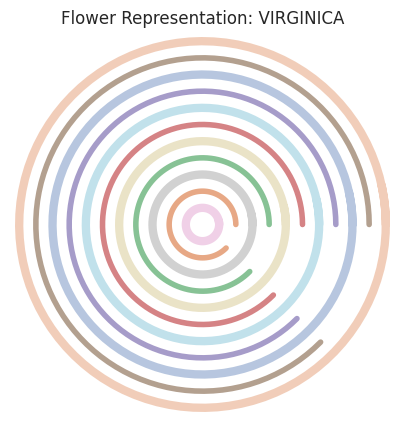

In [10]:
def classify_flower():
    print("Enter flower measurements:")
    sl = float(input("Sepal length: "))
    sw = float(input("Sepal width: "))
    pl = float(input("Petal length: "))
    pw = float(input("Petal width: "))

    flower = pd.DataFrame([[sl, sw, pl, pw]], columns=iris.feature_names)
    prediction = model.predict(flower)[0]
    predicted_name = iris.target_names[prediction]

    print(f"\nPredicted species: {predicted_name.upper()}")
    draw_flower(
        sepal_length=sl,
        sepal_width=sw,
        petal_length=pl,
        petal_width=pw,
        species=predicted_name
    )

# It's now handled inside classify_flower.
classify_flower()